In [88]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
     


In [89]:
dataset = sklearn.datasets.fetch_california_housing()
df = pd.DataFrame(dataset.data, columns = dataset.feature_names)

In [90]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [91]:
df['price'] = dataset.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [92]:
df.shape


(20640, 9)

In [93]:
df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0       False     False     False      False       False     False     False   
1       False     False     False      False       False     False     False   
2       False     False     False      False       False     False     False   
3       False     False     False      False       False     False     False   
4       False     False     False      False       False     False     False   
...       ...       ...       ...        ...         ...       ...       ...   
20635   False     False     False      False       False     False     False   
20636   False     False     False      False       False     False     False   
20637   False     False     False      False       False     False     False   
20638   False     False     False      False       False     False     False   
20639   False     False     False      False       False  

In [94]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


<Axes: >

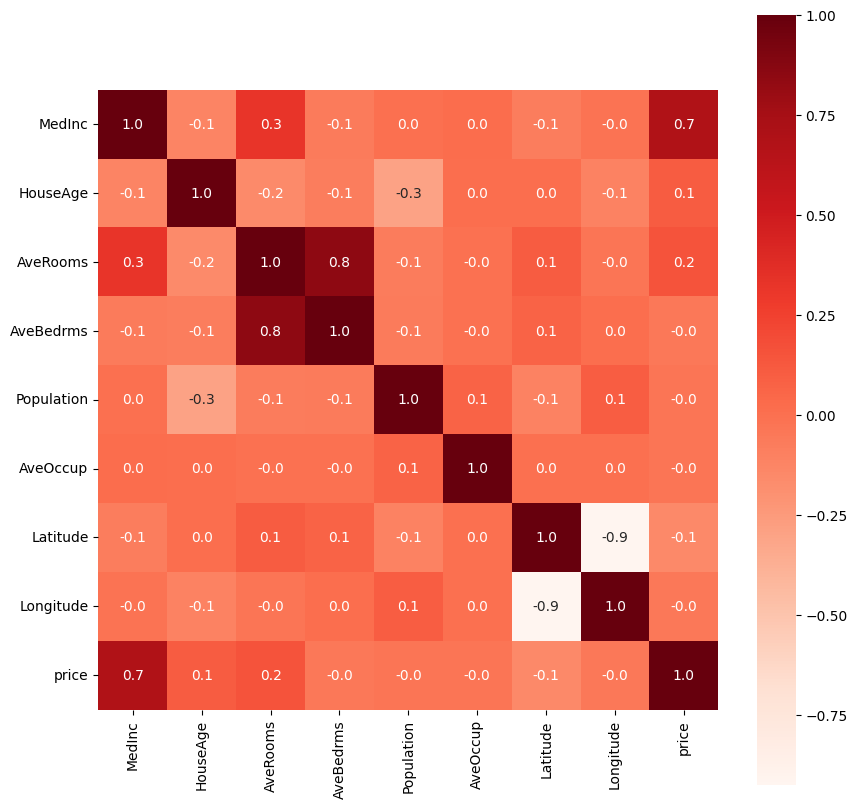

In [95]:
correlation = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, cmap='Reds' )

In [96]:
X = df.drop(['price'], axis=1)
Y = df['price']
print(X, Y)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

In [97]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(20640, 8) (16512, 8) (4128, 8)


In [98]:
model = XGBRegressor()
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [99]:
training_pred = model.predict(X_train)

In [100]:
score1 = metrics.r2_score(Y_train, training_pred)
score2 = metrics.mean_absolute_error(Y_train, training_pred)
print("R squared Error: ", score1, "\nMean squared error: ", score2)

R squared Error:  0.943650140819218 
Mean squared error:  0.1933648700612105


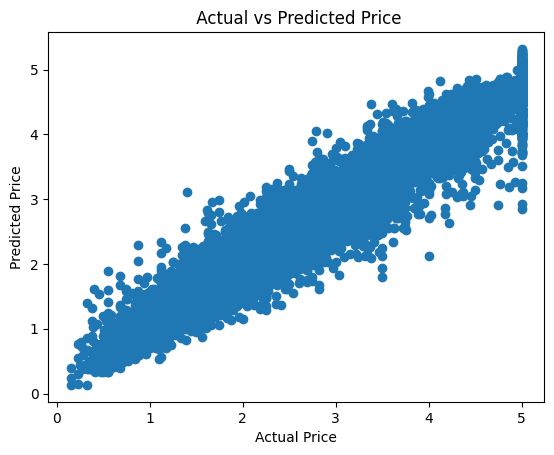

In [101]:
plt.scatter(Y_train, training_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual vs Predicted Price")
plt.show()

In [102]:
testing_pred = model.predict(X_test)
score_1 = metrics.r2_score(Y_test, testing_pred)
score_2 = metrics.mean_absolute_error(Y_test, testing_pred)
print('R Sqaured Error:', score_1)
print('Mean Absolute Error:', score_2)


R Sqaured Error: 0.8338000331788725
Mean Absolute Error: 0.3108631800268186


In [103]:
comparison_df = pd.DataFrame({'Actual': Y_test, 'Predicted': testing_pred})

print(comparison_df.head(10))


       Actual  Predicted
10385   2.787   2.864980
1943    2.076   1.790346
7490    0.967   0.920749
16889   3.538   4.088710
11416   3.905   3.543368
10297   3.088   1.933211
16843   2.813   2.647103
11528   0.675   0.894867
18951   0.990   1.257515
3728    2.822   3.026567


The model performs very well on the training data and also performs quite well on the test data.
Mean Absolute Error is higher on the test data compared to the training data, which is expected, but the difference is not too large. This means that the model is fairly robust.

TRYING RANDOMFOREST REGRESSOR :

In [104]:
from sklearn.ensemble import RandomForestRegressor


In [105]:
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [106]:
train_pred = model.predict(X_train)

In [107]:
score1 = metrics.r2_score(Y_train, train_pred)
score2 = metrics.mean_absolute_error(Y_train, train_pred)
print("R squared Error: ", score1, "\nMean squared error: ", score2)

R squared Error:  0.9739534412938179 
Mean squared error:  0.12089930228318857


In [108]:
test_pred = model.predict(X_test)


In [109]:
score_1 = metrics.r2_score(Y_test, test_pred)
score_2 = metrics.mean_absolute_error(Y_test, test_pred)
print('R Sqaured Error:', score_1)
print('Mean Absolute Error:', score_2)

R Sqaured Error: 0.8052157533504721
Mean Absolute Error: 0.33314139819525224


In [110]:
importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values('Importance', ascending=False)


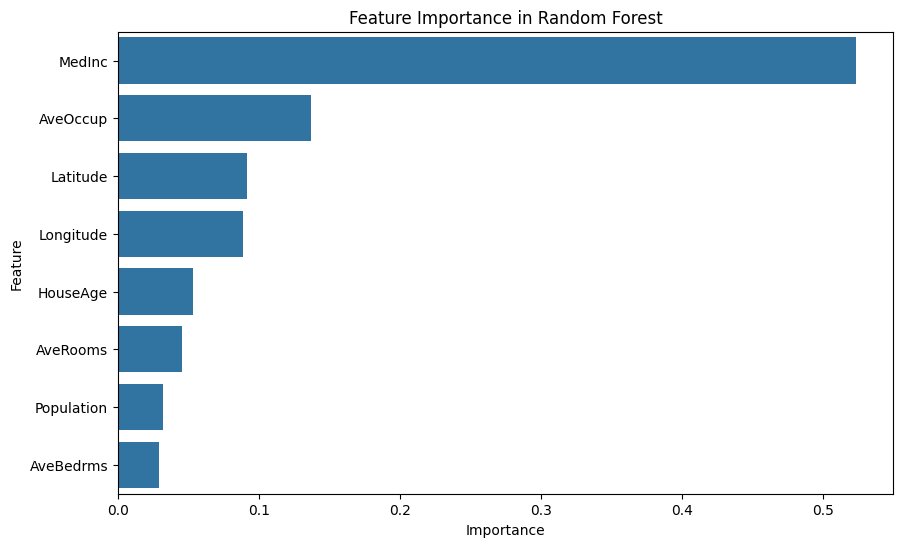

In [111]:
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance in Random Forest')
plt.show()


In [112]:
comparison_df = pd.DataFrame({'Actual': Y_test, 'Predicted': test_pred})

print(comparison_df.head(10))


       Actual  Predicted
10385   2.787   2.948015
1943    2.076   1.758870
7490    0.967   0.943060
16889   3.538   3.690591
11416   3.905   3.718671
10297   3.088   2.432835
16843   2.813   2.636150
11528   0.675   1.234010
18951   0.990   1.278390
3728    2.822   2.830205
